<a href="https://colab.research.google.com/github/Da23849156/Project/blob/master/API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 嘗試一

### 讀取套件

In [0]:
import numpy as np
import matplotlib.pyplot as plt

### 讀取fashion_mnist資料檔

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 檢視資料集

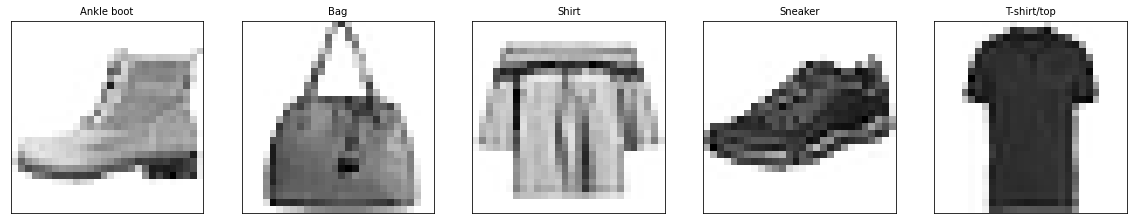

In [28]:
pick = np.random.choice(60000, 5, replace=False)
plt.figure(figsize=(20,10)) # 調整畫布的大小

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

# 資料前處理

In [0]:
from tensorflow.keras.utils import to_categorical
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 建立functional API模型
input layer後訓練過程將產生分歧，一部分資料會到conv1（activation=relu），另一部分資料會會到conv2 (activation=sigmoid）。兩個卷積層皆會使用he_uniform進行初始化。

卷積層訓練的結果會先合併後再進行maxpooling，並隨後使用average pooling layer減少模型訓練參數。最後使用兩個dense層輸出。

In [30]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,Input,concatenate, add

from tensorflow.keras.layers import Input,Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import plot_model


input_layer = Input(shape=(28,28,1), name='input')

### convolutional block 1 ###
conv1 = Conv2D(32, (3, 3), padding='same', activation='relu',kernel_initializer='he_uniform', name='conv1',input_shape=(28, 28, 1))(input_layer)
conv2 = Conv2D(32, (3, 3), padding='same', activation='sigmoid', kernel_initializer='he_uniform',name='conv2',input_shape=(28, 28, 1))(input_layer)

out = concatenate([conv1, conv2], name='concatenate')

maxpooling= MaxPooling2D(pool_size=(2, 2), name='MaxPooling2D')(out)

averagePooling = GlobalAveragePooling2D(name='GlobalAveragePooling2D')(maxpooling)
dense=Dense(32, activation='relu', kernel_initializer='he_uniform',name='Desne1')(averagePooling)
### fully-connected layer as a classfier ###
dense2=Dense(10, activation='softmax',name='Desne2')(dense)

model = Model(input_layer, dense2)
model.summary()



Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 28, 28, 32)   320         input[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 28, 28, 32)   320         input[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 28, 64)   0           conv1[0][0]                      
                                                                 conv2[0][0]                

## 視覺化模型

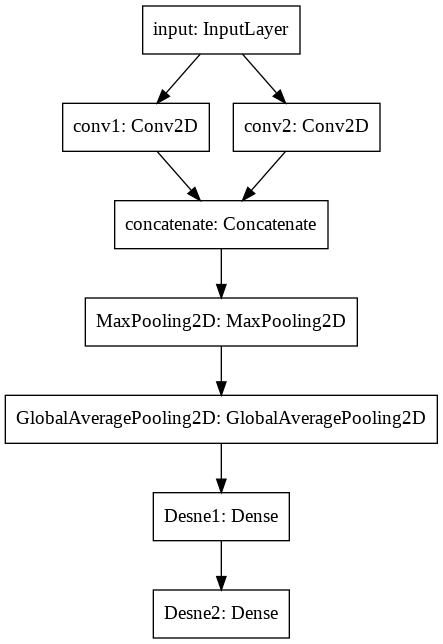

In [17]:
plot_model(model, to_file='my model.png')

## 訓練模型

In [33]:
model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train_new,y_train_new,batch_size=128,epochs=5)

Epoch 1/5
422/422 [==============================] - 39s 91ms/step - loss: 2.0252 - accuracy: 0.2483
Epoch 2/5
422/422 [==============================] - 39s 92ms/step - loss: 2.0155 - accuracy: 0.2570
Epoch 3/5
422/422 [==============================] - 39s 93ms/step - loss: 2.0099 - accuracy: 0.2585
Epoch 4/5
422/422 [==============================] - 39s 93ms/step - loss: 2.0058 - accuracy: 0.2604
Epoch 5/5
422/422 [==============================] - 39s 93ms/step - loss: 2.0022 - accuracy: 0.2641


In [34]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 1.9929 - accuracy: 0.2468


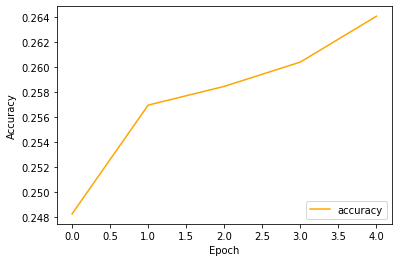

In [36]:
plt.plot(history.history['accuracy'], label='accuracy',color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

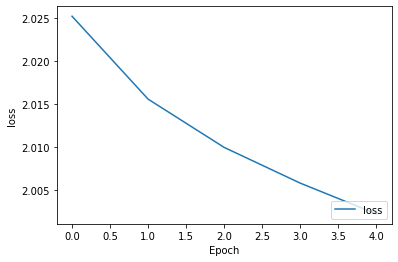

In [37]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

## model 結果統整
> **Train accuracy**： 26%

> **Test accuracy**： 24.6%

## 嘗試二
改變1：分支的卷積層隨後分別接上maxpooling以及flatten，最後合併起來。

改變2：調整dense層的參數

In [38]:
input_layer = Input(shape=(28,28,1), name='input')

#分支處
conv1 = Conv2D(32, (3, 3), padding='same', activation='relu',kernel_initializer='he_uniform', name='conv1',input_shape=(28, 28, 1))(input_layer)
maxpooling1= MaxPooling2D(pool_size=(2, 2), name='maxpooling1')(conv1)
flatten1=Flatten(name='flatten1')(maxpooling1)
conv2 = Conv2D(32, (3, 3), padding='same', activation='sigmoid', kernel_initializer='he_uniform',name='conv2',input_shape=(28, 28, 1))(input_layer)
maxpooling2= MaxPooling2D(pool_size=(2, 2), name='maxpooling2')(conv2)
flatten2=Flatten(name='flatten2')(maxpooling2)

out = concatenate([flatten1, flatten2], name='concatenate')

#調整Desne層的units參數
dense=Dense(64, activation='relu', kernel_initializer='he_uniform',name='Desne1')(out)
dense2=Dense(10, activation='softmax',name='Desne2')(dense)

model2 = Model(input_layer, dense2)
model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 28, 28, 32)   320         input[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 28, 28, 32)   320         input[0][0]                      
__________________________________________________________________________________________________
maxpooling1 (MaxPooling2D)      (None, 14, 14, 32)   0           conv1[0][0]                      
____________________________________________________________________________________________

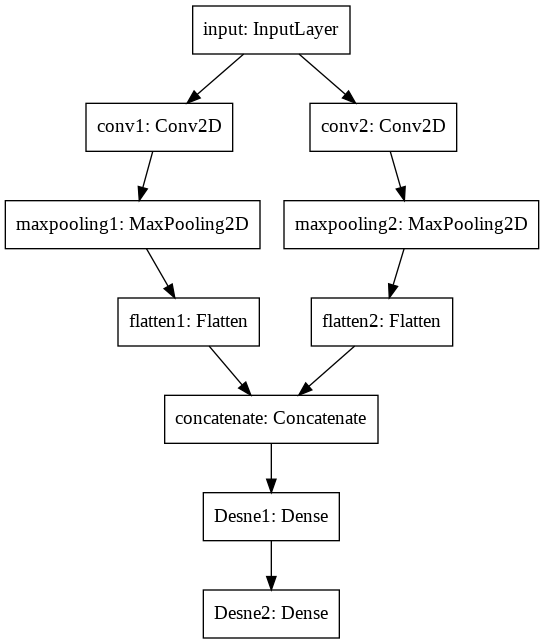

In [39]:
plot_model(model2, to_file='my model.png')

## 訓練模型
在編譯時新增momentum，使得模型接近最佳解的時候，可以降低學習速率。

In [0]:
model2.compile(optimizer=SGD(lr=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [43]:
response=model2.fit(x_train,y_train,batch_size=128,epochs=5)

Epoch 1/5
469/469 [==============================] - 46s 99ms/step - loss: 0.2984 - accuracy: 0.8919
Epoch 2/5
469/469 [==============================] - 46s 99ms/step - loss: 0.2731 - accuracy: 0.9009
Epoch 3/5
469/469 [==============================] - 46s 99ms/step - loss: 0.2633 - accuracy: 0.9044
Epoch 4/5
469/469 [==============================] - 46s 99ms/step - loss: 0.2510 - accuracy: 0.9088
Epoch 5/5
469/469 [==============================] - 46s 98ms/step - loss: 0.2452 - accuracy: 0.9106


## 模型評估

In [44]:
score2 = model2.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.3461 - accuracy: 0.8811


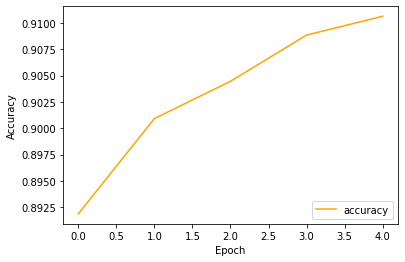

In [45]:
plt.plot(response.history['accuracy'], label='accuracy',color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

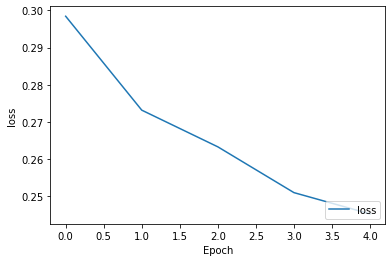

In [46]:
plt.plot(response.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

## model2結果統整
> **Train accuracy**： 91%

> **Test accuracy**： 88%

**根據結果顯示，新的API模型的正確率遠遠高於舊的API模型。
我自己認為是舊的API使用average pooling層的關係把訓練參數吃掉所致。因此新的模型改用flatten後正確率明顯回升很多。 ***